In [2]:
import pandas as pd

df = pd.read_csv("../data/train.csv")  

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nMissing values after handling:\n", df.isnull().sum())

df.to_csv("cleaned_train.csv", index=False)



Missing values in each column:
 id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

Missing values after handling:
 id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type

In [3]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ['Gender', 'Smoking Status']  
label_encoders = {}

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df = pd.get_dummies(df, columns=['Marital Status', 'Policy Type', 'Location', 'Property Type', 'Occupation'], drop_first=True)

# Verify encoding
print(df.head())


   id   Age  Gender  Annual Income  Number of Dependents Education Level  \
0   0  19.0       0        10049.0                   1.0      Bachelor's   
1   1  39.0       0        31678.0                   3.0        Master's   
2   2  23.0       1        25602.0                   3.0     High School   
3   3  21.0       1       141855.0                   2.0      Bachelor's   
4   4  21.0       1        39651.0                   1.0      Bachelor's   

   Health Score  Previous Claims  Vehicle Age  Credit Score  ...  \
0     22.598761              2.0         17.0         372.0  ...   
1     15.569731              1.0         12.0         694.0  ...   
2     47.177549              1.0         14.0         595.0  ...   
3     10.938144              1.0          0.0         367.0  ...   
4     20.376094              0.0          8.0         598.0  ...   

   Marital Status_Married Marital Status_Single Policy Type_Comprehensive  \
0                    True                 False          

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Premium Amount'])  
y = df['Premium Amount']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (960000, 25), Test set: (240000, 25)


In [9]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Education Level', 'Policy Start Date', 'Customer Feedback',
       'Exercise Frequency'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ['Gender', 'Smoking Status'] 
label_encoders = {}

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  


In [12]:
print(df.columns)


Index(['id', 'Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Education Level', 'Health Score', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Premium Amount', 'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Location_Suburban',
       'Location_Urban', 'Property Type_Condo', 'Property Type_House',
       'Occupation_Self-Employed', 'Occupation_Unemployed'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  


In [14]:
missing_cols = [col for col in ['Marital Status', 'Policy Type', 'Location', 'Property Type', 'Occupation'] if col not in df.columns]
print("Missing Columns:", missing_cols)


Missing Columns: ['Marital Status', 'Policy Type', 'Location', 'Property Type', 'Occupation']


In [15]:
print(df.select_dtypes(include=['object']).columns)


Index(['Education Level', 'Policy Start Date', 'Customer Feedback',
       'Exercise Frequency'],
      dtype='object')


In [17]:
df = pd.get_dummies(df, columns=['Education Level'], drop_first=True)


In [ ]:
df = df.drop(columns=['id', 'Policy Start Date']) 

X = df.drop(columns=['Premium Amount'])  
y = df['Premium Amount'] 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train and test sets created!")


Train and test sets created!


In [21]:
print(X_train.dtypes)


Age                            float64
Gender                           int64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Customer Feedback               object
Smoking Status                   int64
Exercise Frequency              object
Marital Status_Married            bool
Marital Status_Single             bool
Policy Type_Comprehensive         bool
Policy Type_Premium               bool
Location_Suburban                 bool
Location_Urban                    bool
Property Type_Condo               bool
Property Type_House               bool
Occupation_Self-Employed          bool
Occupation_Unemployed             bool
Education Level_High School       bool
Education Level_Master's          bool
Education Level_PhD               bool
dtype: object


In [22]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [23]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")


Feature scaling completed successfully!


In [28]:
print(X_train.columns)
print(X_test.columns)


Index(['Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Smoking Status', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Comprehensive',
       'Policy Type_Premium', 'Location_Suburban', 'Location_Urban',
       'Property Type_Condo', 'Property Type_House',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly'],
      dtype='object')
Index(['Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Smoking Status', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Comprehensive',
 

In [ ]:
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum())  

0 0


In [ ]:
print(X_train.dtypes)  

Age                            float64
Gender                           int64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Smoking Status                   int64
Marital Status_Married            bool
Marital Status_Single             bool
Policy Type_Comprehensive         bool
Policy Type_Premium               bool
Location_Suburban                 bool
Location_Urban                    bool
Property Type_Condo               bool
Property Type_House               bool
Occupation_Self-Employed          bool
Occupation_Unemployed             bool
Education Level_High School       bool
Education Level_Master's          bool
Education Level_PhD               bool
Customer Feedback_Good            bool
Customer Feedback_Poor            bool
Exercise Frequency_Monthl

In [31]:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (960000, 28), Test set: (240000, 28)


In [ ]:
print(X_train.describe()) 


                 Age         Gender  Annual Income  Number of Dependents  \
count  960000.000000  960000.000000  960000.000000         960000.000000   
mean       41.151511       0.502149   32416.011842              2.007269   
std        13.428755       0.499996   31622.764940              1.350817   
min        18.000000       0.000000       1.000000              0.000000   
25%        30.000000       0.000000    8631.000000              1.000000   
50%        41.000000       1.000000   23911.000000              2.000000   
75%        53.000000       1.000000   43936.000000              3.000000   
max        64.000000       1.000000  149997.000000              4.000000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  960000.000000    960000.000000  960000.000000  960000.000000   
mean       25.553645         1.002492       9.572253     593.219854   
std        11.825510         0.821020       5.774514     141.079027   
min         2.012237         0.

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")


MAE: 667.3253891319358
MSE: 745361.3157748074


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")


Random Forest MAE: 660.7891514583334
Random Forest MSE: 733782.6287759851


In [36]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")


XGBoost MAE: 647.9048702770233
XGBoost MSE: 718732.9271956286


In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

y_pred_best_xgb = best_xgb.predict(X_test)

mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)

print(f"Optimized XGBoost MAE: {mae_best_xgb}")
print(f"Optimized XGBoost MSE: {mse_best_xgb}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimized XGBoost MAE: 645.1596106664975
Optimized XGBoost MSE: 717105.5464226742


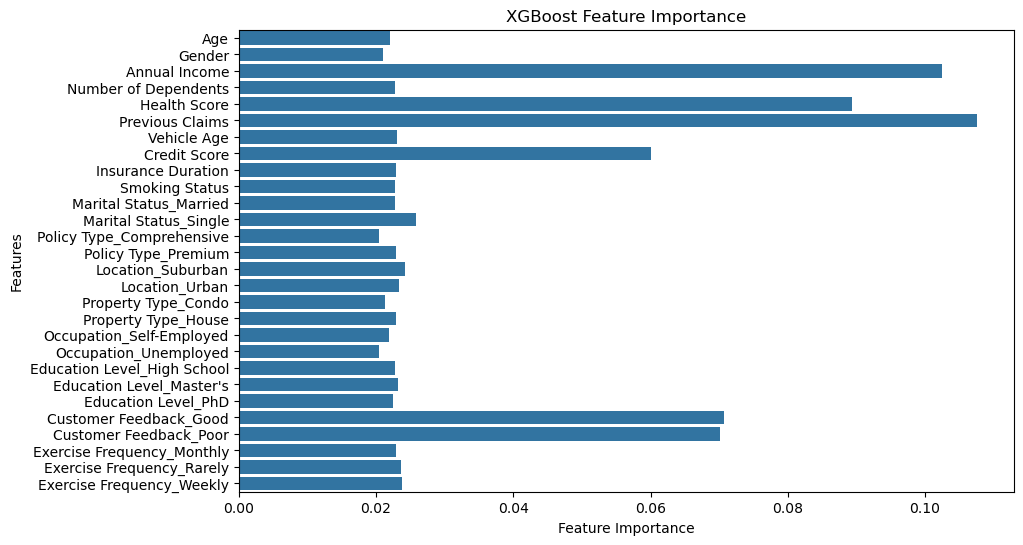

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [39]:
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred_best_xgb)
print(f"Optimized XGBoost R² Score: {r2_xgb}")


Optimized XGBoost R² Score: 0.04038621948834131


In [40]:
import joblib
joblib.dump(best_xgb, "xgb_model.pkl")


['xgb_model.pkl']

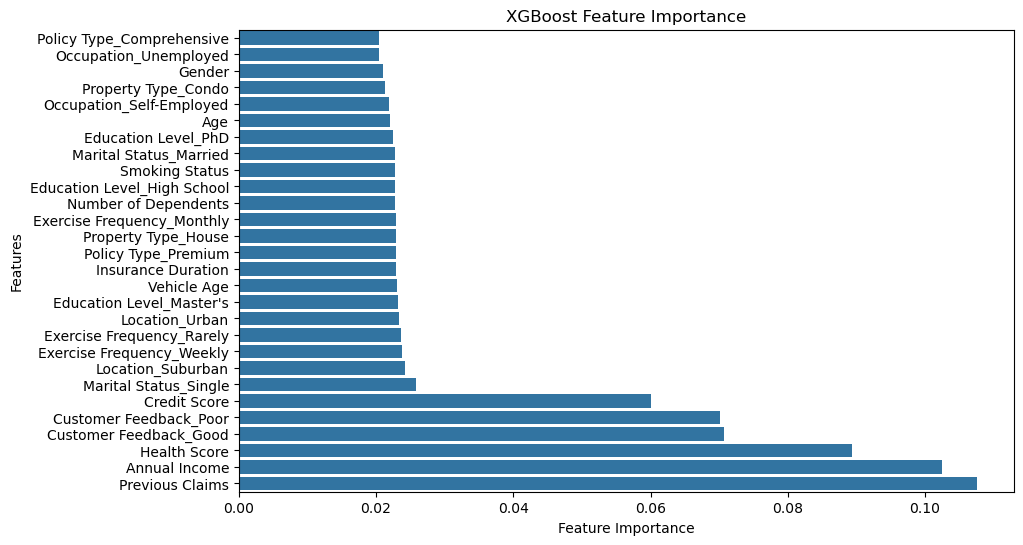

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_xgb.feature_importances_
features = X_train.columns

sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [42]:
from sklearn.metrics import r2_score

r2_xgb = r2_score(y_test, y_pred_best_xgb)
print(f"Optimized XGBoost R² Score: {r2_xgb}")


Optimized XGBoost R² Score: 0.04038621948834131


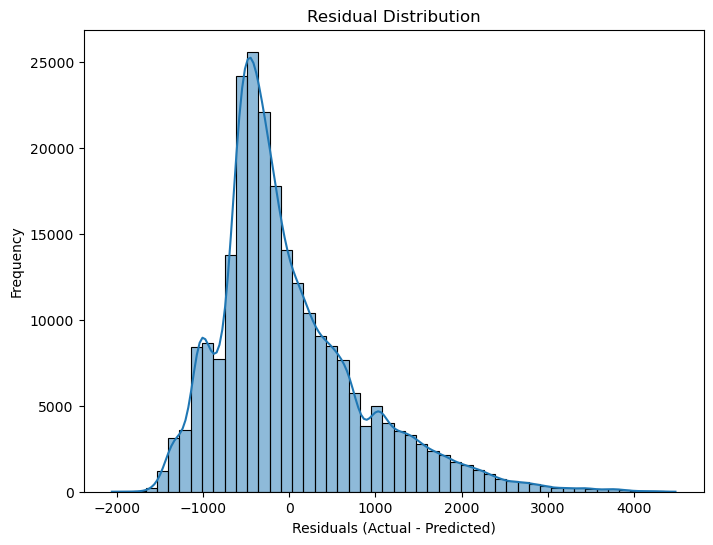

In [43]:
import numpy as np

residuals = y_test - y_pred_best_xgb

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [ ]:
import joblib

joblib.dump(best_xgb, "xgb_model.pkl")

print("Model saved as xgb_model.pkl")


Model saved as xgb_model.pkl


In [ ]:
loaded_model = joblib.load("xgb_model.pkl")

sample_data = X_test.iloc[:5] 
predictions = loaded_model.predict(sample_data)

print("Sample Predictions:", predictions)


Sample Predictions: [1195.1754 1322.6863 1118.3687  978.8108 1160.3572]
